In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

524523

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

524523

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

12033

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

12033

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

88632

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

88632

In [16]:
epochs = 20
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Slacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,729
Trainable params: 13,729
Non-traina

In [17]:
array_Xtrain

array([[[0.33043478, 0.        , 0.25423729, 1.        , 1.        ],
        [0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        ...,
        [0.08478261, 0.30434783, 0.        , 0.        , 0.5       ],
        [0.07608696, 0.30434783, 0.25423729, 0.        , 0.5       ],
        [0.0673913 , 0.30434783, 0.50847458, 0.        , 0.5       ]],

       [[0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        [0.35      , 0.04347826, 0.        , 0.8       , 1.        ],
        ...,
        [0.07608696, 0.30434783, 0.25423729, 0.        , 0.5       ],
        [0.0673913 , 0.30434783, 0.50847458, 0.        , 0.5       ],
        [0.05869565, 0.30434783, 0.76271186, 0.        , 0.5       ]],

       [[0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        [0.35      , 0.04347826, 0.        , 0.8       , 1. 

In [18]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [19]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False)
#history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_v1.h5')

Epoch 1/20
16392/16392 [==============================] - 6543s 399ms/step - loss: 0.0020 - mae: 0.0317 - mse: 0.0020 - val_loss: 7.2515e-04 - val_mae: 0.0228 - val_mse: 7.2515e-04
Epoch 2/20
16392/16392 [==============================] - 408s 25ms/step - loss: 0.0014 - mae: 0.0269 - mse: 0.0014 - val_loss: 0.0012 - val_mae: 0.0302 - val_mse: 0.0012
Epoch 3/20
16392/16392 [==============================] - 402s 25ms/step - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - val_loss: 6.5382e-04 - val_mae: 0.0208 - val_mse: 6.5382e-04
Epoch 4/20
16392/16392 [==============================] - 397s 24ms/step - loss: 0.0013 - mae: 0.0260 - mse: 0.0013 - val_loss: 8.2712e-04 - val_mae: 0.0237 - val_mse: 8.2712e-04
Epoch 5/20
16392/16392 [==============================] - 380s 23ms/step - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - val_loss: 4.4385e-04 - val_mae: 0.0171 - val_mse: 4.4385e-04
Epoch 6/20
16392/16392 [==============================] - 398s 24ms/step - loss: 0.0013 - mae: 0.0258 - mse: 0.

2770/2770 [==============================] - 25s 9ms/step - loss: 3.6982e-04 - mae: 0.0142 - mse: 3.6982e-04
test loss, test acc: [0.00036981754237785935, 0.01415465958416462, 0.00036981754237785935]


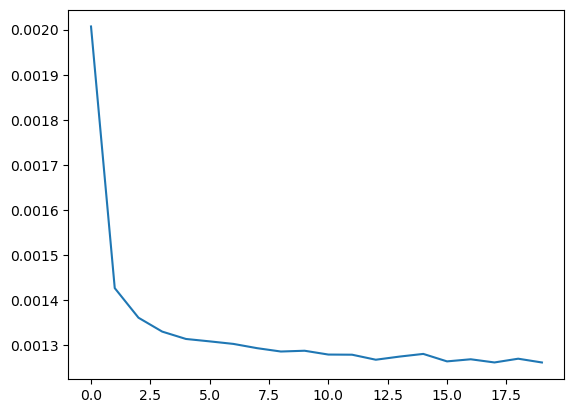

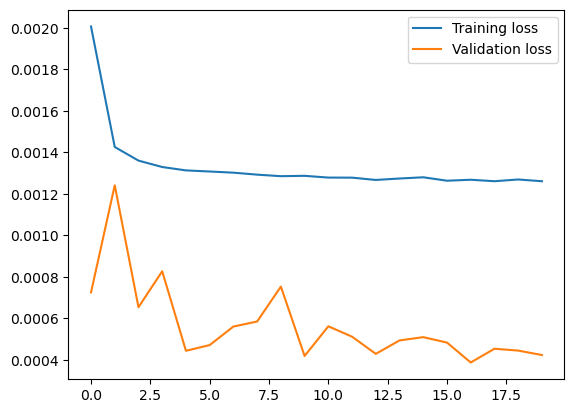

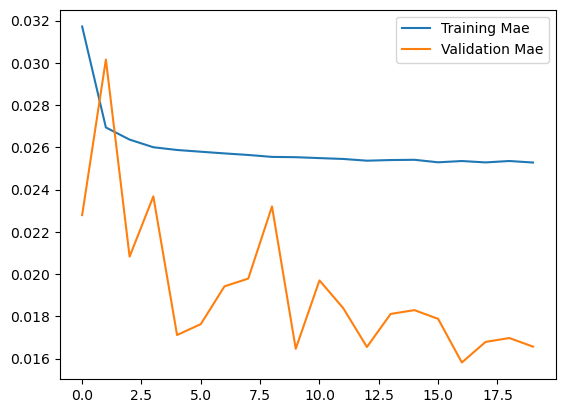

In [20]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

2770/2770 [==============================] - 28s 10ms/step


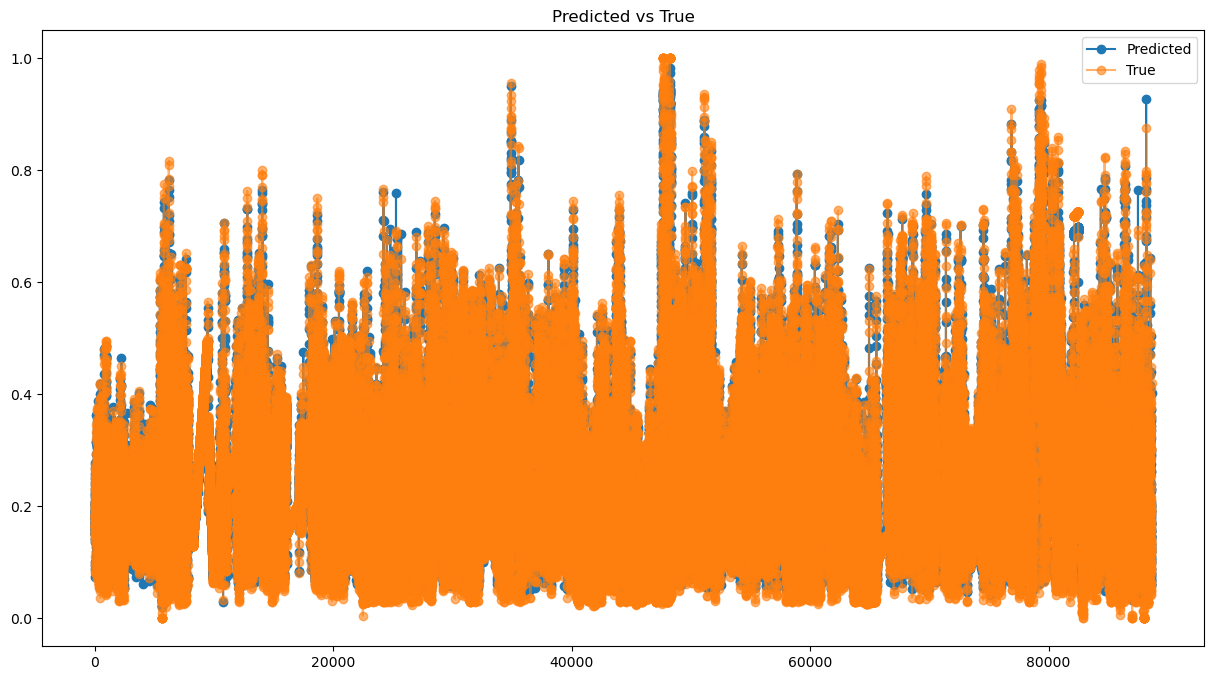

In [21]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [22]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.014154667296007303,
 'mse': 0.01923064587869538,
 'rmse': 0.0003698177409117836}